# Defining Dataset and using Random Undersampler

Counter({0: 9900, 1: 100})


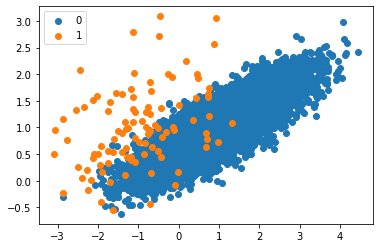

Counter({0: 100, 1: 100})


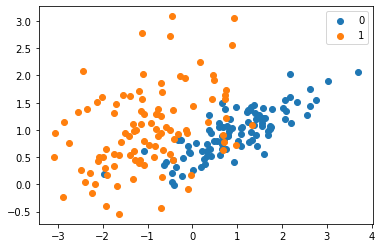

In [2]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from imblearn.under_sampling import RandomUnderSampler
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y) # summarize class distribution
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()
counter = Counter(y)
# define the undersampling method
undersample = RandomUnderSampler()
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Undersampling using Condensed Nearest Neighbor Rule

Counter({0: 9900, 1: 100})
Counter({0: 189, 1: 100})


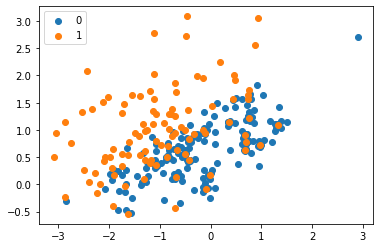

In [3]:
# Undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Adding Tomek Links on Condensed Nearest Neighbor

Counter({0: 9900, 1: 100})
Counter({0: 188, 1: 100})


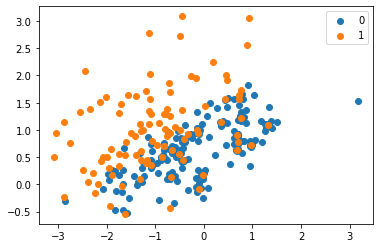

Counter({0: 188, 1: 100})
Counter({0: 148, 1: 100})


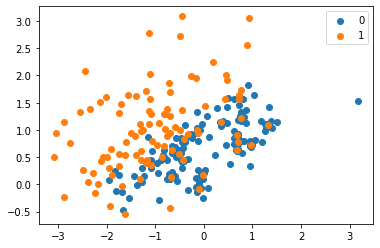

In [4]:
# Undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()
## now Adding Tomek Link Algorithm to the output
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Predict if a person will have Diabetes or not

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv('c:/data/diabetes.csv')

In [7]:
len(dataset)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [9]:
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [10]:
# split dataset
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [11]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

614
614
154
154


In [12]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [14]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [15]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [16]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


In [17]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182
